# NER --- Confusion Matrix and Classification Report

## How to use the nerval package

In [1]:
!pip install nerval

In [2]:
import os
import json
from nerval import crm, plot_confusion_matrix

## Test different dataset shapes :

### 1. List of nested lists [[[ ]]] 

In [3]:
y_true = [[['O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC'], 
           ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 
           'O', 'B-PER', 'O', 'O', 'O']], 
          [['B-TITLE', 'I-TITLE', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 
           'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'O', 'O', 'B-PER', 'O'], 
          ['B-LOC', 'O', 'O', 'O', 'O', 'B-ORG', 
           'I-ORG', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'B-DATE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 
           'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]]


y_pred = [[['O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC'],
          ['B-GEOPOL', 'I-CURRENCY', 'B-GEOPOL', 'B-GEOPOL', 'I-ORG', 'O', 'O', 'B-GEOPOL', 'I-ORG', 'B-GEOPOL', 'O', 
           'B-LOC', 'O', 'B-DATE', 'O', 'O', 'I-CURRENCY', 'I-PERCENT', 'O', 'B-DATE', 'O', 'B-DATE', 'O', 'I-PERCENT']], 
          [['B-TITLE', 'O', 'B-DATE', 'O', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'I-CURRENCY', 'O', 'I-PERCENT', 'O', 
           'O', 'O', 'O', 'I-ORG', 'O', 'O', 'O'], 
          ['I-ORG', 'B-DATE', 'B-GEOPOL', 'I-CURRENCY', 'B-GEOPOL', 'I-CURRENCY', 'O', 'B-LOC', 'B-GEOPOL', 'B-GEOPOL', 
           'B-LOC', 'I-CURRENCY', 'O', 'O', 'O', 'O', 'B-GEOPOL', 'B-GEOPOL', 'B-GEOPOL', 'I-CURRENCY', 'O', 'O', 'B-DATE', 
           'I-CURRENCY', 'I-CURRENCY', 'O', 'B-GEOPOL', 'B-GEOPOL', 'B-DATE', 'O', 'I-PERCENT']]]

### 2. Flat lists [ ]

In [4]:
# y_true = ['O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC']
# y_pred = ['O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC']

### 3. Lists of flat lists [[ ]]

In [5]:
# y_true = [
#           ['O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC'], 
#           ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 
#            'O', 'B-PER', 'O', 'O', 'O'], 
#           ['B-TITLE', 'I-TITLE', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 
#            'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'O', 'O', 'B-PER', 'O'], 
#           ['B-LOC', 'O', 'O', 'O', 'O', 'B-ORG', 
#            'I-ORG', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'B-DATE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 
#            'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
#          ]


# y_pred = [
#           ['O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC'],
#           ['B-GEOPOL', 'I-CURRENCY', 'B-GEOPOL', 'B-GEOPOL', 'I-ORG', 'O', 'O', 'B-GEOPOL', 'I-ORG', 'B-GEOPOL', 'O', 
#            'B-LOC', 'O', 'B-DATE', 'O', 'O', 'I-CURRENCY', 'I-PERCENT', 'O', 'B-DATE', 'O', 'B-DATE', 'O', 'I-PERCENT'], 
#           ['B-TITLE', 'O', 'B-DATE', 'O', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'I-CURRENCY', 'O', 'I-PERCENT', 'O', 
#            'O', 'O', 'O', 'I-ORG', 'O', 'O', 'O'], 
#           ['I-ORG', 'B-DATE', 'B-GEOPOL', 'I-CURRENCY', 'B-GEOPOL', 'I-CURRENCY', 'O', 'B-LOC', 'B-GEOPOL', 'B-GEOPOL', 
#            'B-LOC', 'I-CURRENCY', 'O', 'O', 'O', 'O', 'B-GEOPOL', 'B-GEOPOL', 'B-GEOPOL', 'I-CURRENCY', 'O', 'O', 'B-DATE', 
#            'I-CURRENCY', 'I-CURRENCY', 'O', 'B-GEOPOL', 'B-GEOPOL', 'B-DATE', 'O', 'I-PERCENT']
#          ]


## Create Classification Report and Confusion Matrix

In [6]:
cr, cm, cm_labels = crm(y_true, y_pred, scheme='BIO')

Dataset was in the wrong shape: list of nested lists.
It has been converted into the correct shape: list of flat lists. 

************************************************************************************************************************
Dataset was in the wrong shape: list of nested lists.
It has been converted into the correct shape: list of flat lists. 

************************************************************************************************************************
True Entities: 14
Pred Entities: 35 

True Entities with 3 or more tags: 1
Pred Entities with 3 or more tags: 1 

True positives:  0
False positives (true = 'O'):  29
False positives (true <> pred):  6
ToT False positives:  35
False negatives:  8 



In [7]:
print(cr)

              precision  recall  f1_score  true_entities  pred_entities
PER                0.00    0.00      0.00           5.00           0.00
LOC                0.00    0.00      0.00           3.00           5.00
DATE               0.00    0.00      0.00           3.00           7.00
ORG                0.00    0.00      0.00           2.00           2.00
TITLE              0.00    0.00      0.00           1.00           0.00
PERCENT            0.00    0.00      0.00           0.00           3.00
GEOPOL             0.00    0.00      0.00           0.00          14.00
PER__              0.00    0.00      0.00           0.00           1.00
TITLE__            0.00    0.00      0.00           0.00           1.00
CURRENCY           0.00    0.00      0.00           0.00           2.00
micro_avg          0.00    0.00      0.00          14.00          35.00
macro_avg          0.00    0.00      0.00          14.00          35.00
weighted_avg       0.00    0.00      0.00          14.00        

In [8]:
print(len(cm_labels))
print(cm_labels)
# print(cm)

11
['CURRENCY', 'DATE', 'GEOPOL', 'LOC', 'O', 'ORG', 'PER', 'PERCENT', 'PER__', 'TITLE', 'TITLE__']


## Plot Not Normalised Confusion Matrix

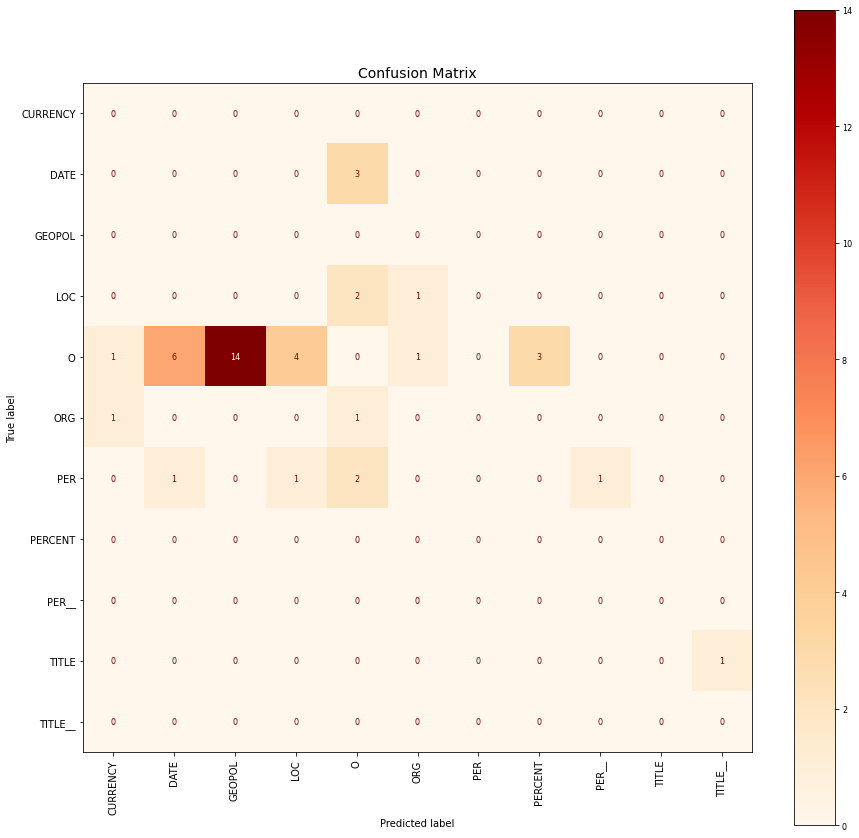

In [9]:
plot_confusion_matrix(cm, 
                      cm_labels,
                      normalize=None,                      # normalise: None, 'true', 'pred', 'all'. Default is None.
                      decimal_places=2,
                      figsize=(15,15), 
                      SMALL_SIZE=8, 
                      MEDIUM_SIZE=12, 
                      BIGGER_SIZE=14, 
                      cmap='OrRd', 
                      xticks_rotation='vertical', 
                      title='Confusion Matrix')

## Normalise = 'true'

In an unnormalised confusion matrix, the sum of each row represents the total actual value for each class label (ORG, PER, LOC,...).

**The confusion matrix normalised on 'true' will show what % of that actual total was predicted by the classifier to belong to each one of the available classes.**

For instance, for class 'CREATIVEWORK', the true creativework entities are in total 104 but the classifier predicted the following:

-  8 CREATIVEWORK    ==>  8% of 104 (i.e. of the total true entities)
-  4 CREATIVEWORK__  ==>  4% of 104 (i.e. of the total true entities)
-  5 LOC             ==>  5% of 104 (i.e. of the total true entities)
- 57 O               ==> 55% of 104 (i.e. of the total true entities)
- 12 ORG             ==> 12% of 104 (i.e. of the total true entities)
- 14 PER             ==> 13% of 104 (i.e. of the total true entities)
-  4 PRODUCT         ==>  4% of 104 (i.e. of the total true entities)

### Note: the values on the diagonal match the RECALL scores in the classification report

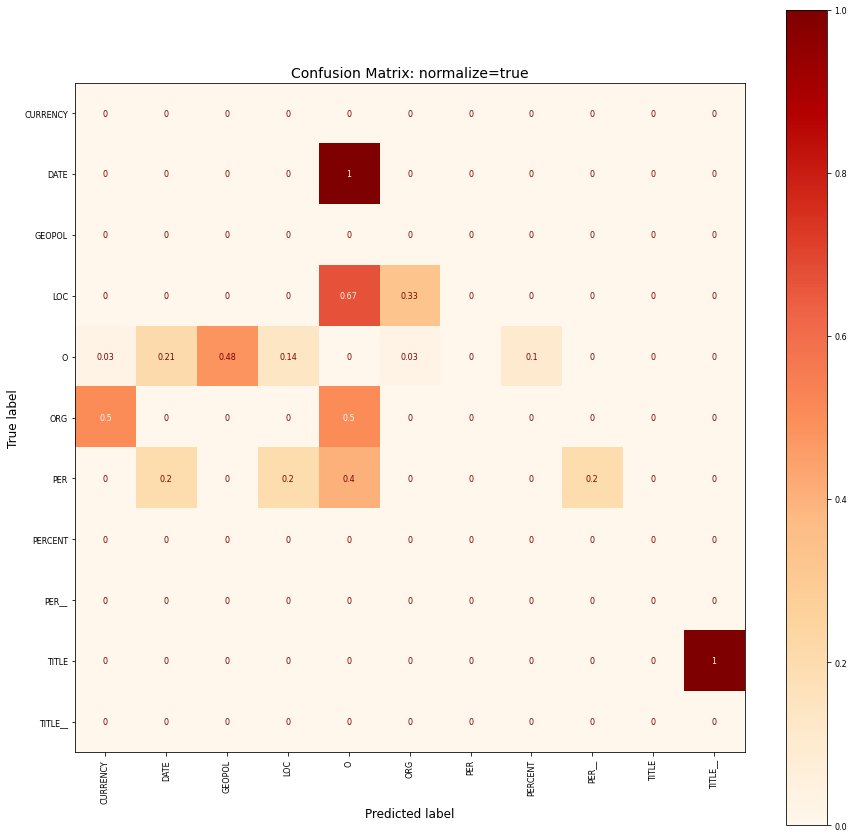

In [10]:
plot_confusion_matrix(cm, 
                      cm_labels,
                      normalize='true',                      # normalise: None, 'true', 'pred', 'all'. Default is None.
                      decimal_places=2,
                      figsize=(15,15), 
                      SMALL_SIZE=8, 
                      MEDIUM_SIZE=12, 
                      BIGGER_SIZE=14, 
                      cmap='OrRd', 
                      xticks_rotation='vertical', 
                      title='Confusion Matrix: normalize=true')

## Normalise = 'pred'

In an unnormalised confusion matrix, the sum of each column represents the total predicted value for each class label (ORG, PER, LOC,...).

**The confusion matrix normalised on 'pred' will show what % of the total class predictions was made against each of the available classes.**

**Example 1**: the classifier predicted the class 'CREATIVEWORK__' 4 times in total. All of these predictions where made against the true class 'CREATIVEWORK', therefor in the normalised confusion matrix we'll se 1 at the cross of CREATIVEWORK/CREATIVEWORK__.

**Example 2**: the classifier predicted the class 'PRODUCT' 43 times in total. These predictions where split in the following way:

-   4 CREATIVEWORK  ==>   9% of 43 (i.e. of the total predicted entities)
-  12 O             ==>  28% of 43 (i.e. of the total predicted entities)
-   3 ORG           ==>   7% of 43 (i.e. of the total predicted entities)
-  24 PRODUCT       ==>  56% of 43 (i.e. of the total predicted entities)


### Note: the values on the diagonal match the PRECISION scores in the classification report

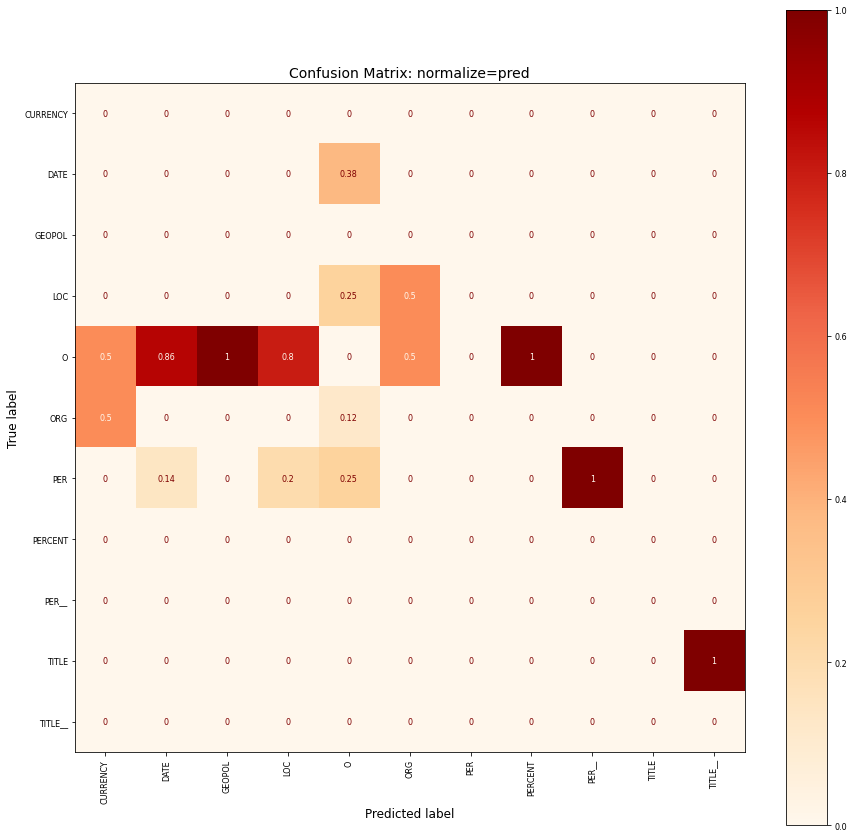

In [11]:
plot_confusion_matrix(cm, 
                      cm_labels,
                      normalize='pred',                      # normalise: None, 'true', 'pred', 'all'. Default is None.
                      decimal_places=2,
                      figsize=(15,15), 
                      SMALL_SIZE=8, 
                      MEDIUM_SIZE=12, 
                      BIGGER_SIZE=14, 
                      cmap='OrRd', 
                      xticks_rotation='vertical', 
                      title='Confusion Matrix: normalize=pred')